In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd 
import seaborn as sns
import colorcet as cc


import networkx as nx

In [2]:
edge_df = pd.read_csv("sdg_edges.csv")

# Create an undirected graph
G = nx.Graph()
# Add all 17 SDG nodes (1 to 17) explicitly to ensure they're included even if isolated
G.add_nodes_from(range(1, 18))
# Add edges from the CSV
G.add_edges_from([(row["node1"], row["node2"]) for _, row in edge_df.iterrows()])

# Assign node labels as SDG numbers
nx.set_node_attributes(G, {i: str(i) for i in range(1, 18)}, "label")

# Define SDG colors
sdg_colors = {
    1: "#E5243B",   # No Poverty
    2: "#DDA63A",   # Zero Hunger
    3: "#4C9F38",   # Good Health and Well-being
    4: "#C5192D",   # Quality Education
    5: "#FF3A21",   # Gender Equality
    6: "#26BDE2",   # Clean Water and Sanitation
    7: "#FCC30B",   # Affordable and Clean Energy
    8: "#A21942",   # Decent Work and Economic Growth
    9: "#FD6925",   # Industry, Innovation, and Infrastructure
    10: "#DD1367",  # Reduced Inequalities
    11: "#FD9D24",  # Sustainable Cities and Communities
    12: "#BF8B2E",  # Responsible Consumption and Production
    13: "#3F7E44",  # Climate Action
    14: "#0A97D9",  # Life Below Water
    15: "#56C02B",  # Life on Land
    16: "#00689D",  # Peace, Justice, and Strong Institutions
    17: "#19486A"   # Partnerships for the Goals
}

# Assign colors to nodes based on their SDG number
node_colors = [sdg_colors[node] for node in G.nodes()]
edge_widths = [1.0 for _ in G.edges()]

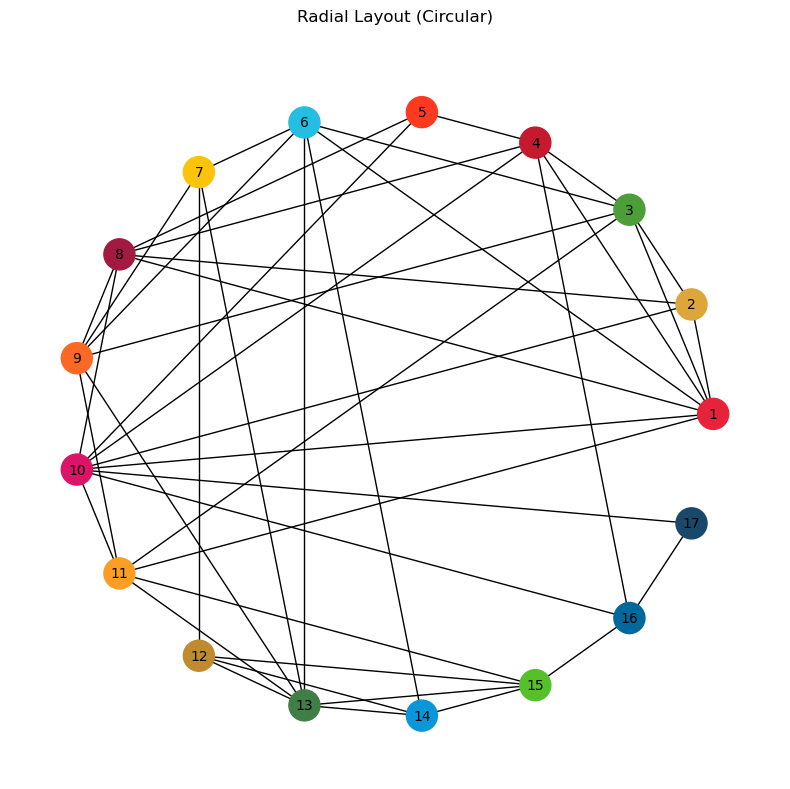

In [3]:
# 1. Radical layout

pos_radial = nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos=pos_radial, node_color=node_colors, node_size=500, ax=ax)
nx.draw_networkx_labels(G, pos=pos_radial, labels=nx.get_node_attributes(G, "label"), font_size=10, ax=ax)
nx.draw_networkx_edges(G, pos=pos_radial, width=edge_widths, ax=ax)
ax.set_axis_off()
plt.title("Radial Layout (Circular)", pad=20)
plt.tight_layout()
plt.show()
# plt.savefig("sdg_radial.png", transparent=True, bbox_inches="tight", format="png")
plt.close()

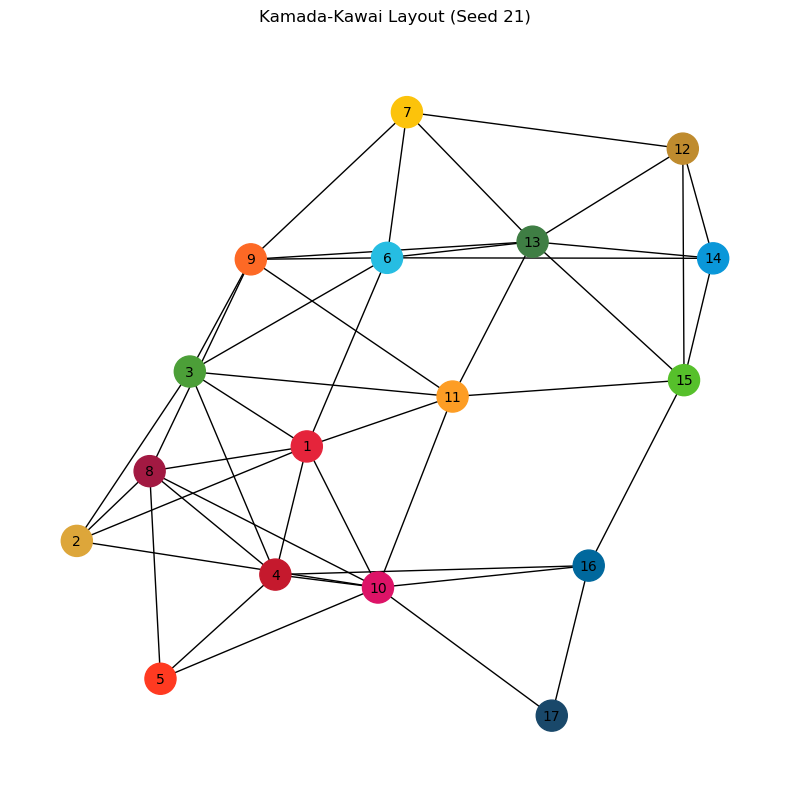

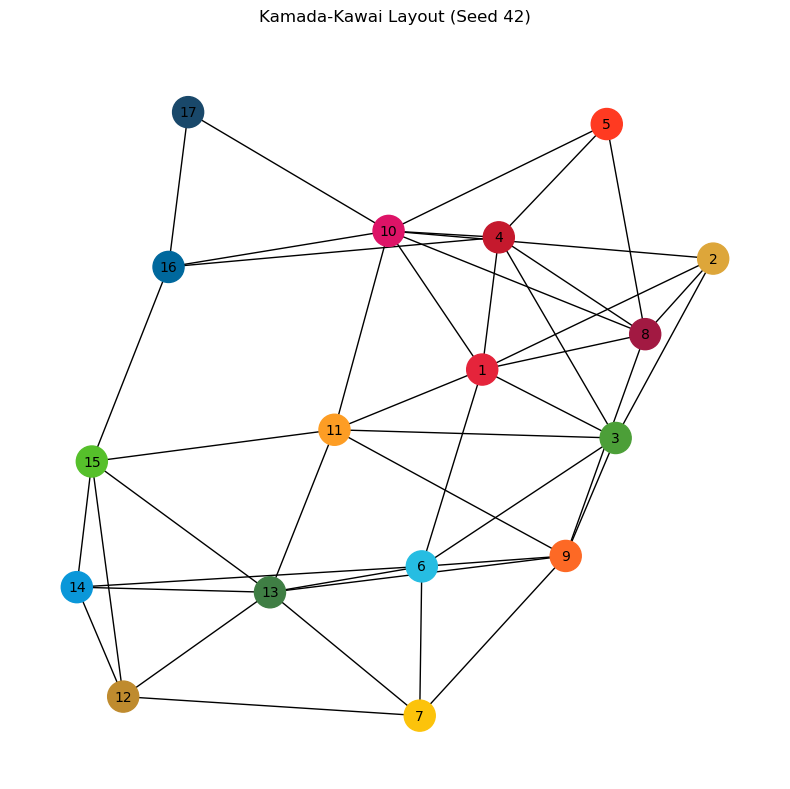

In [12]:
# 2. Kamada-Kawai Layout with Two Random Seeds
for seed, filename in [(21, "sdg_kamada_seed21.png"), (42, "sdg_kamada_seed42.png")]:
    np.random.seed(seed)
    
    # Create initial random positions to introduce randomness
    initial_pos = {node: np.random.rand(2) for node in G.nodes()}
    
    # Compute Kamada-Kawai layout based on perturbed starting positions
    pos_kk = nx.kamada_kawai_layout(G, pos=initial_pos)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_nodes(G, pos=pos_kk, node_color=node_colors, node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos=pos_kk, labels=nx.get_node_attributes(G, "label"), font_size=10, ax=ax)
    nx.draw_networkx_edges(G, pos=pos_kk, width=edge_widths, ax=ax)
    ax.set_axis_off()
    plt.title(f"Kamada-Kawai Layout (Seed {seed})", pad=20)
    plt.tight_layout()
    plt.show()
    #plt.savefig(filename, transparent=True, bbox_inches="tight", format="png")
    plt.close()

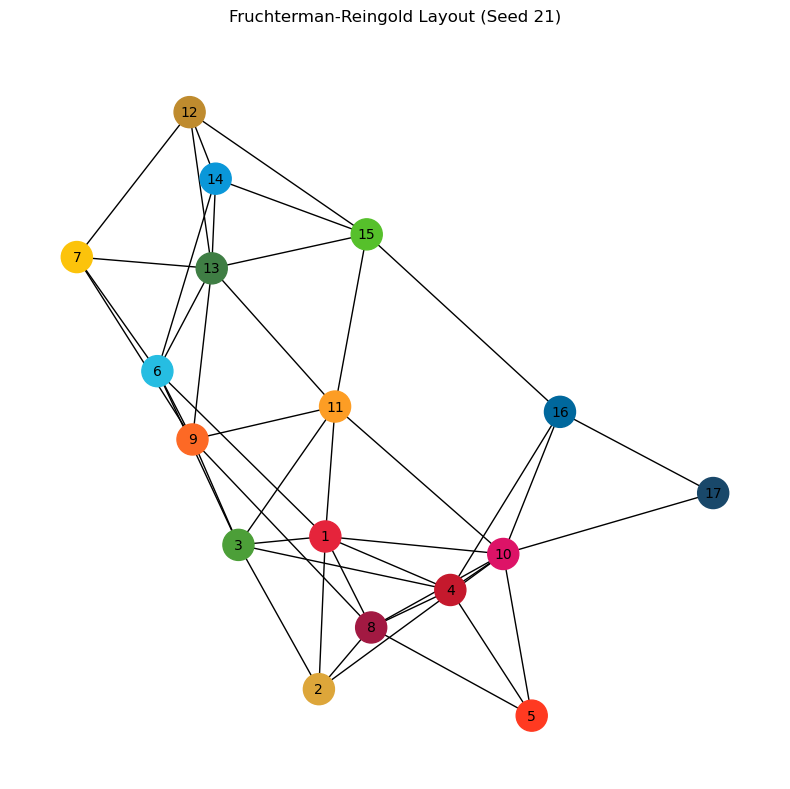

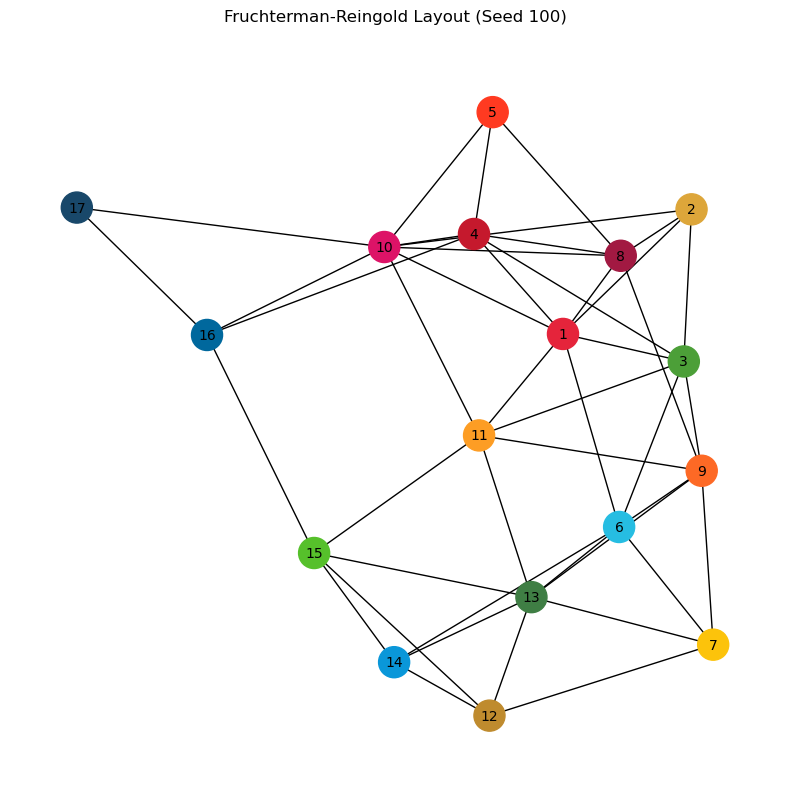

In [13]:
# 3. Fruchterman-Reingold layout with two different random seeds

for seed, filename in [(21, "sdg_fruchterman_seed42.png"), (100, "sdg_fruchterman_seed123.png")]:
    np.random.seed(seed)
    pos_fr = nx.fruchterman_reingold_layout(G)
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_nodes(G, pos=pos_fr, node_color=node_colors, node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos=pos_fr, labels=nx.get_node_attributes(G, "label"), font_size=10, ax=ax)
    nx.draw_networkx_edges(G, pos=pos_fr, width=edge_widths, ax=ax)
    ax.set_axis_off()
    plt.title(f"Fruchterman-Reingold Layout (Seed {seed})", pad=20)
    plt.tight_layout()
    plt.show()
    #plt.savefig(filename, transparent=True, bbox_inches="tight", format="png")
    plt.close()